# Mob programming!

Today we are going to work on Peter's simulation.

## Ising Model

The Ising model was created by Dr. Ernst ising to model ferromagnetic and anti-ferromagnetic materials.  The model represents a lattice occupied by atoms which have dipole moments which can either be up or down.  The model is typically created using a monte carlo markov chain to simulate the system.

The Hamiltonian of the system is given by 
\begin{equation}
\mathcal H = -J_{ij} \sum_{ij} s_i s_j - h \sum_i s_i
\end{equation}
where $h$ is an external field, $s_i$ is the spin of particle $i$ and $J_{ij}$ is the coupling parameter between the adjacent atoms.

The probability model says that state $S = \{s_1 = S_1, ..., s_i= S_i \}$
\begin{equation}
P(S) \propto \mathrm{e}^{-\beta \mathcal{H}}
\end{equation}


### 1 Describe the following code with as much detail as possible.

-391.5


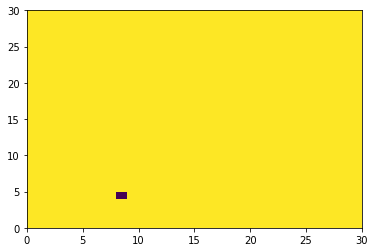

-391.5


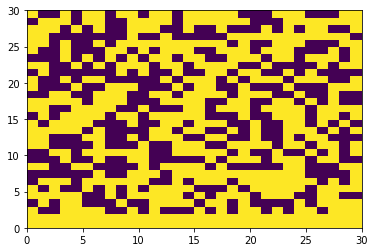

-391.5


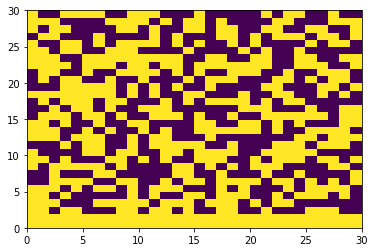

-391.5


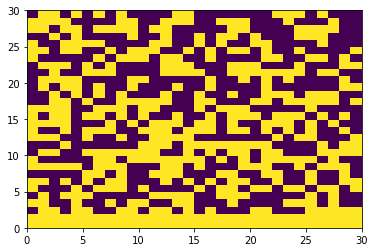

-391.5


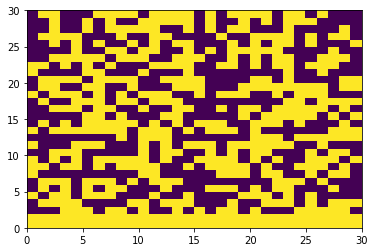

-391.5


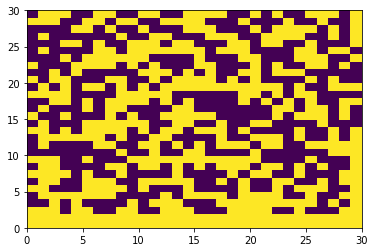

-391.5


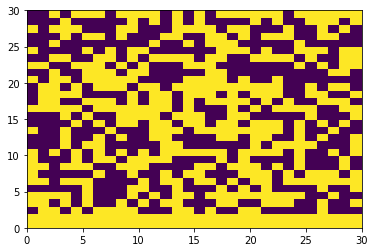

-391.5


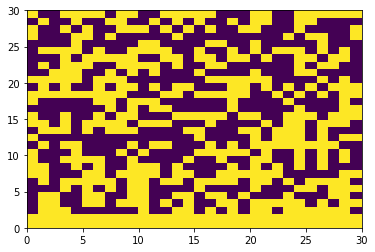

-391.5


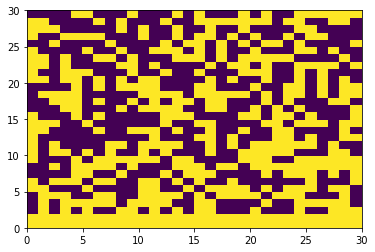

-391.5


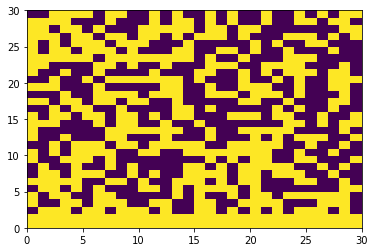

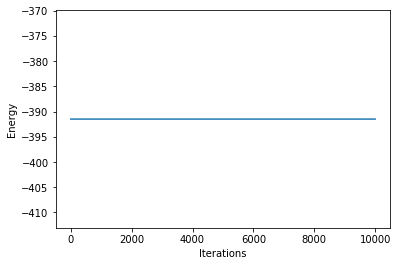

In [4]:
import numpy as numpy
from matplotlib import pyplot as plt
%matplotlib inline
nx = 30
ny = 30
def J(si,sj): 
    return 1/np.linalg.norm(si-sj)**2
def Ising(T,h, niter, J=lambda si,sj:1, initialState = numpy.sign(numpy.random.rand(nx,ny)), delta = 1):
    def applyPeriodicBoundaries(array):

        #Sets array values of array[end,:]= array[0,:]
        array[-1,:]= array[0,:]
        array[:,-1]= array[:,0]   
        return array

    def hamiltonian(array):
        q = 0
        
        for i in range(2,nx-1):
            for j in range(0,ny-1):
                for ii in range(-1*delta,1*delta):
                    for jj in range(-1*delta,1*delta):
                        #print(i+ii,j+jj,i,j)
                        if ii != 0 and jj !=0:
                            si = array[i,j]
                            sj = array[i+ii,j+jj]
                            cf = J(si, sj)
                            q += -cf/2*array[i,j]*array[i+ii,j+jj]
                        else:
                            #print(h)
                            #print(array[i,j])
                            q += h*array[i,j]
        return q

    
    #applyPeriodicBoundaries(initialState)  #Arrays are passed via pointers
    #niter = 100000
    #T = .1
    hLast = hamiltonian(initialState)
    hs = [hLast];
    state = initialState
    for i in range(0,niter):
        #select one particle to flip
        trialState = state
        xx = numpy.random.randint(2,nx)
        yy = numpy.random.randint(0,ny)
        trialState[xx, yy] = -1*trialState[xx, yy] #flip one 
        hTrial = hamiltonian(trialState)
        alpha = numpy.random.rand()
        #print(hLast, hTrial, numpy.exp((hLast-hTrial)/T) )
        if hLast-hTrial > 0:
            hLast = hTrial
            state = trialState
        elif numpy.exp((hLast-hTrial)/T) > alpha: #accept new state
            hLast = hTrial
            state = trialState
            
        hs.append(hLast)
        if numpy.remainder(i,numpy.floor(niter/10)) == 0:
            print(hLast)
            plt.figure()
            plt.pcolor(state)
            plt.show()
    return(state, hs)
state, hList = Ising(.05,0, 10000)
plt.figure()
plt.plot(hList)
plt.xlabel('Iterations')
plt.ylabel('Energy')
plt.show()



### 2 Explain the following lines:



In [8]:
alpha = numpy.random.rand()
        #print(hLast, hTrial, numpy.exp((hLast-hTrial)/T) )
if numpy.exp((hLast-hTrial)/T) > alpha: #accept new state
    hLast = hTrial
    state = trialState

NameError: name 'hLast' is not defined

What is the role of alpha?


What is the role of T?

What is hLast-hTrial?

When will the particle flip?

How do we parametrize energy?

How would you label the axis?

Explain the following lines:

In [ ]:
if numpy.remainder(i,numpy.floor(niter/10)) == 0:
                      1000
    print(hLast)
    plt.figure()
    plt.pcolor(state)
    plt.show()

Explain the output.

### 3 Modify the code to have an initial state when all atoms are down.

-420.5


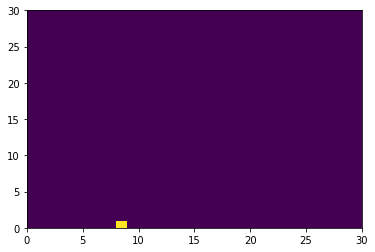

-420.5


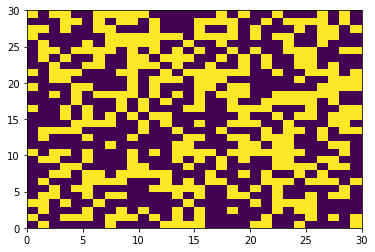

-420.5


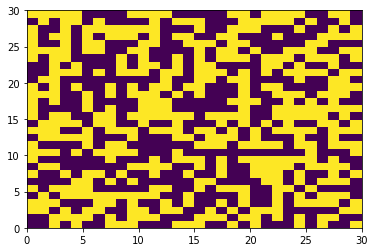

-420.5


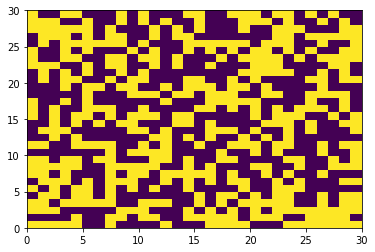

-420.5


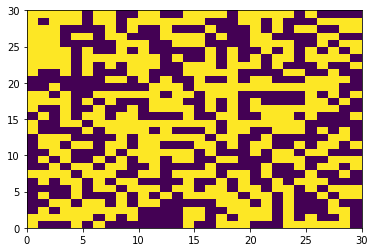

-420.5


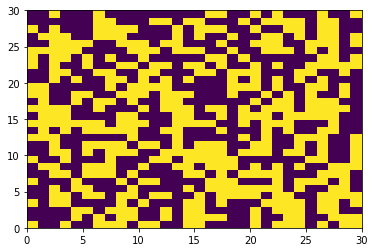

-420.5


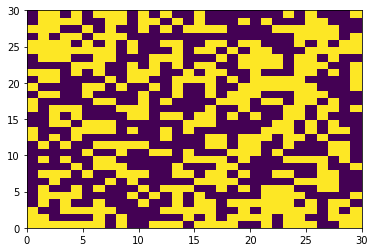

-420.5


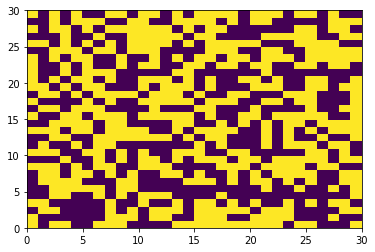

-420.5


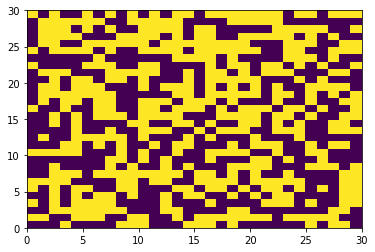

-420.5


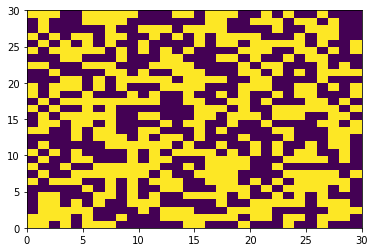

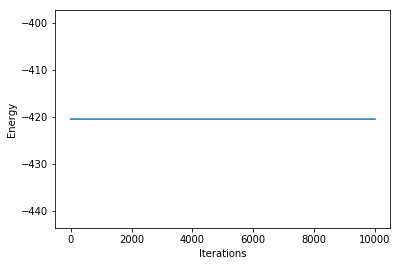

In [9]:
#Ising(T,h, niter, initialState = numpy.sign(numpy.random.rand(nx,ny)))
state, hList = Ising(.01,0, 10000,initialState= -1*np.ones([nx,ny]))
plt.figure()
plt.plot(hList)
plt.xlabel('Iterations')
plt.ylabel('Energy')
plt.show()

### 4 Modify the code to let the coupling parameter be non zero for atoms within distance 2 units.

8.5


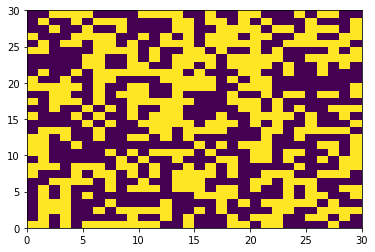

-115.5


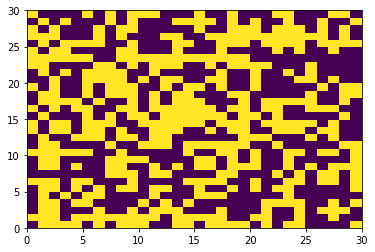

-115.5


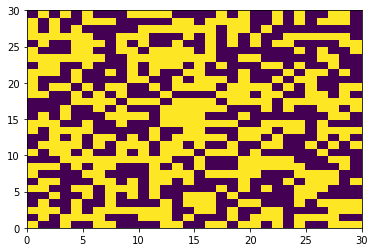

-115.5


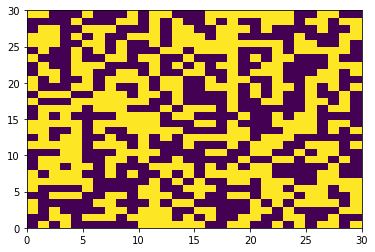

-115.5


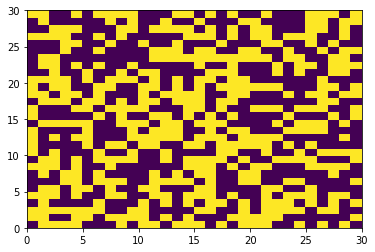

-115.5


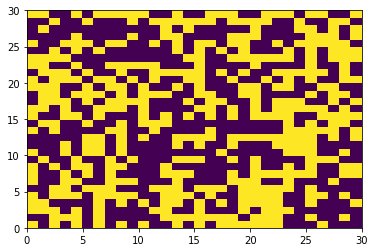

-154.5


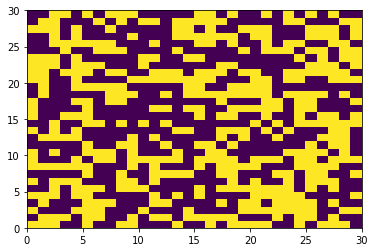

-154.5


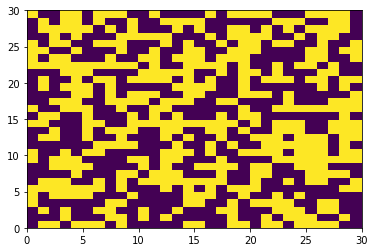

-154.5


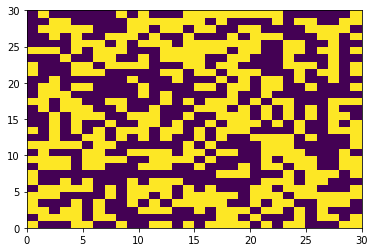

-154.5


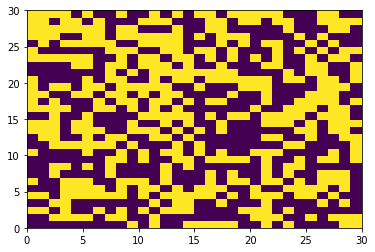

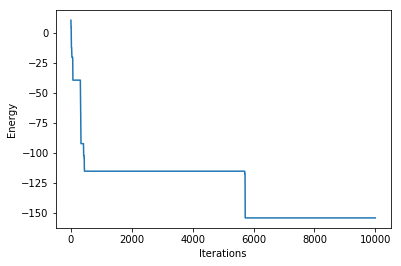

In [14]:
state, hList = Ising(.01, 0, 10000, delta = 2)
plt.figure()
plt.plot(hList)
plt.xlabel('Iterations')
plt.ylabel('Energy')
plt.show()

### 5 What would be a more realistic coupling parameter?

Modify the code to use the class chosen parameter.

### 6 What is the role of temperature? 
